# Project Notebook: Network Analysis

In this notebook, we will explore the analysis of network-structured data using the NetworkX package. This package makes it easy to handle and analyse network-structured data, with many standard network algorithms implemented out-of-the-box. Along the way, we'll also learn about some other helpful tools, and use a little NumPy and matplotlib.

Let's start by importing NetworkX. This is a simple `import` statement.

To display graphs, we will need to import matplotlib. We can do this using `import matplotlib`, but it is actually more convenient to use the command `%pylab inline`. This imports NumPy and matplotlib in a way that allows them to interface well with NetworkX within Jupyter notebooks. Note that `%pylab inline` is a Jupyter-notebooks specific command (any command starting with % is not native python and is known as a Jupyter "magic" command). 

In [1]:
%pylab inline
import networkx as nx

Populating the interactive namespace from numpy and matplotlib


# Working with Graphs

## A first Graph object
NetworkX is a tool for working with networks, also called _graphs_. A graph is a collection of nodes (also called vertices), which are linked by edges. An edge from vertex $v$ to vertex $w$ can be described as the pair $(v, w)$. We'll soon see how to create our own graphs, but NetworkX also has some classical graphs pre-loaded. Let's look at one of these, a graph of 15th century Florentine families. Two family nodes are linked by an edge if there was a marriage linking the families.

In [2]:
G = nx.florentine_families_graph()
type(G)

networkx.classes.graph.Graph

Now `G` is a Graph object. It has a set of vertices, and a set of edges, each of which we can access.

In [3]:
G.nodes

NodeView(('Acciaiuoli', 'Medici', 'Castellani', 'Peruzzi', 'Strozzi', 'Barbadori', 'Ridolfi', 'Tornabuoni', 'Albizzi', 'Salviati', 'Pazzi', 'Bischeri', 'Guadagni', 'Ginori', 'Lamberteschi'))

In [4]:
G.edges

EdgeView([('Acciaiuoli', 'Medici'), ('Medici', 'Barbadori'), ('Medici', 'Ridolfi'), ('Medici', 'Tornabuoni'), ('Medici', 'Albizzi'), ('Medici', 'Salviati'), ('Castellani', 'Peruzzi'), ('Castellani', 'Strozzi'), ('Castellani', 'Barbadori'), ('Peruzzi', 'Strozzi'), ('Peruzzi', 'Bischeri'), ('Strozzi', 'Ridolfi'), ('Strozzi', 'Bischeri'), ('Ridolfi', 'Tornabuoni'), ('Tornabuoni', 'Guadagni'), ('Albizzi', 'Ginori'), ('Albizzi', 'Guadagni'), ('Salviati', 'Pazzi'), ('Bischeri', 'Guadagni'), ('Guadagni', 'Lamberteschi')])

Note that the objects `G.nodes`, `G.edges` are _views_. Like NumPy views, if we change `G` then the view is accordingly updated.

In [5]:
nodes = G.nodes #Create a node view
G.add_node('Corleone') #Add a sicilian family.
nodes #The node view has changed!

NodeView(('Acciaiuoli', 'Medici', 'Castellani', 'Peruzzi', 'Strozzi', 'Barbadori', 'Ridolfi', 'Tornabuoni', 'Albizzi', 'Salviati', 'Pazzi', 'Bischeri', 'Guadagni', 'Ginori', 'Lamberteschi', 'Corleone'))

To get a visual feel for the data, let's remove that last node and display the graph. To create visuals, `nx` will need matplotlib.

In [6]:
G.remove_node('Corleone') #Remove the non-Florentines.

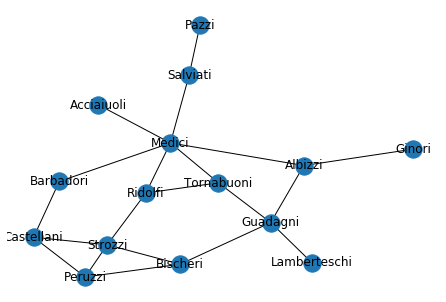

In [7]:
nx.draw(G, with_labels=True)

## Generating Graph objects
We'll also need to know how to create our own graphs in NetworkX. We can build a graph by giving `nx` a list of edges.

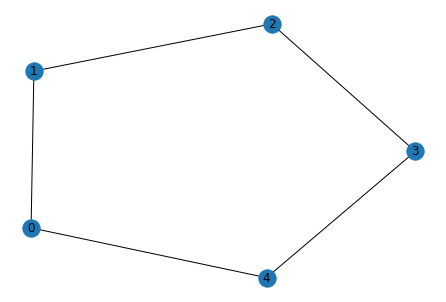

In [8]:
edges = [(0, 1), (1, 2), (2, 3), (3, 4), (4, 0), (0, 4), (4, 0)]
G = nx.Graph(edges)
nx.draw(G, with_labels=True)

There are also methods to add and remove nodes and edges - we saw some of these in the Sicilian families example.

The other kinds of graph we might want to work with are [digraphs](https://networkx.github.io/documentation/networkx-1.10/reference/classes.digraph.html), and [multigraphs](https://networkx.github.io/documentation/networkx-1.9.1/reference/classes.multigraph.html). A digraph (directed graph) is a graph where edges have a notion of direction: the edges $(u, v)$ and $(v, u)$ are considered distinct. In a multigraph,there might be multiple edges joining $u$ and $v$. (Notice how in our example above, there is only one edge created joining 0 and 4?)

We will not be working with digraphs or multigraphs in this notebook.

### Exercise
Write a function `complete_graph` that accepts an integer `n`, and returns a Graph object with `n` nodes each linked to every other node. Check your function by trying a few values of `n` and plotting the graph returned.

In [15]:
def complete_graph(n):
    edges = []
    for i in range(n):
        for j in range(i,n):
            edges.append((i,j))
    G = nx.Graph(edges)
    return G

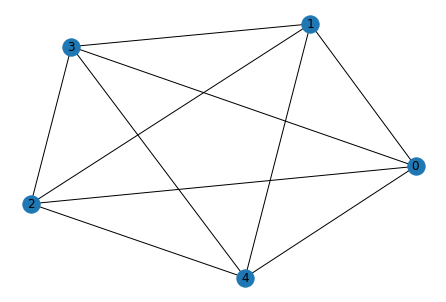

In [16]:
G = complete_graph(5)
nx.draw(G, with_labels=True)

NetworkX also has [a host of graph generating functions](https://networkx.github.io/documentation/stable/reference/generators.html) available. Of particular use might be the functions for generating random graphs. For instance, we can generate a graph at random with $n$ nodes and $m$ edges.

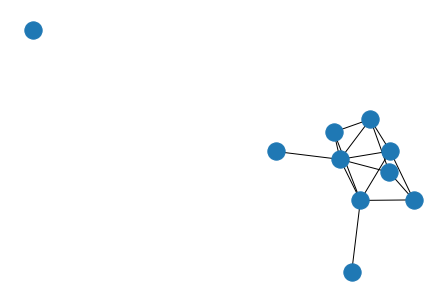

In [17]:
G = nx.gnm_random_graph(10, 15)
nx.draw(G)

All of the methods we have used for creating graphs are called _constructor_ methods.

## Algorithms for Graphs
NetworkX has [convenient implementations](https://networkx.github.io/documentation/stable/reference/algorithms/index.html) of a range of graph algorithms covering a wealth of possible applications. For instance, [Kruskal's algorithm](https://en.wikipedia.org/wiki/Kruskal%27s_algorithm) for finding a minimum spanning tree can be run in one line of code!

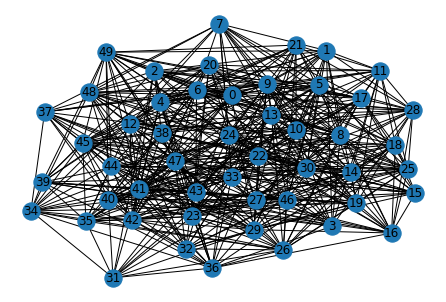

In [18]:
G = nx.connected_watts_strogatz_graph(50, 20, 0.5)
nx.draw(G, with_labels=True)

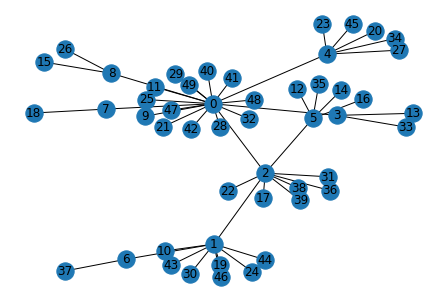

In [19]:
T = nx.minimum_spanning_tree(G)
nx.draw(T, with_labels=True)

We will see and use some more graph algorithms implemented by NetworkX in the next section.

# Extended Example: Email Data
Here we have data<sup>[[1]](#snap)</sup> from an undisclosed European research institution, representing email exchanges between individuals within the institution.

## Loading and preparing the data
The data represents the institution's email network. Individuals are each allocated a unique number. Each line of the file `data/email-Eu-core.txt` has two identifying nummbers separated by a space, e.g. `n m`, denoting that person $n$ sent an email to person $m$.

We want to analyse this data as an undirected graph. To read the data in, create a list called `edges`, and fill it with a tuple for each line of the file. You can either use `numpy.genfromtxt`, and reshape and cast the result to a regular python list, or you can read the file line by line  and use the string utility function `.split()`. Then pass this list to the `nx` constructor for Graphs to create a graph `G`.

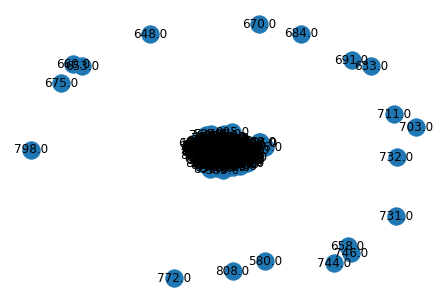

In [24]:
email_data = np.genfromtxt("./data/email-Eu-core.txt",delimiter=" ")
edges = []
for tuple in email_data:
    edges.append((tuple[0],tuple[1]))
G = nx.Graph(edges)
nx.draw(G, with_labels=True)  # can remove this line

The institution is organised into 42 departments, each of which is assigned a unique identifying number. Each line of the file `email-Eu-core-department-labels.txt` has an individual's identifier, followed by the number identifying their department after a space. We can open this file and create a dictionary mapping individuals to their departments.

In [26]:
depts = {}
fptr = open("./data/email-Eu-core-department-labels.txt", "r") #Open the file, read it line-by-line
for l in fptr: 
    depts.update({l.split()[0]:l.split()[1]}) #Split the line on whitespace and add a new key-value pair to the dict

A graph may be connected or disconnected. An undirected graph is connected if any node can reach any other by walking through a sequence of edges: otherwise it is disconnected, and the graph must have at least two different connected components (subgraphs which are themselves connected). 

We can use the method `nx.is_connected` to check if the graph is connected.

In [27]:
nx.is_connected(G)

False

We can get the connected components and check their size: `len(G)` gives the number of nodes of a graph `G`. Note that most connected components contain just one node! 

(Also note the cast to a list here: `nx.connected_component_subgraphs` returns a _generator_ object, not a list.)

In [ ]:
comps = list(nx.connected_component_subgraphs(G))
for c in comps:
    print(len(c))

We might decide that these singleton components are outliers, and then we can obtain the largest connected component of the graph.

In [ ]:
G = sorted(comps, key=len, reverse=True)[0] #Get connected components, sort by size, get biggest
len(G)

## Finding Bridges

One graph property we might be interested in is which edges are bridges. A bridge is an edge which, if removed, would disconnect the graph. Using `nx.bridges`, find out how many bridges this graph has. How many bridges occur within a department?

In [39]:
bridges = list(nx.bridges(G))
len(bridges)

95

In [64]:
num_bridges_depts = np.zeros(42)
for i in range(42):
    nodes = []
    for j in range(len(G)):
        if depts[str(j)] == str(i):
            nodes.append(j)
    subgraph = G.subgraph(nodes)
    num_bridges_depts[i] = len(list(nx.bridges(subgraph)))
num_bridges_depts

array([ 6.,  5.,  1.,  1., 12.,  0., 10.,  4.,  2.,  5.,  3.,  1.,  0.,
        1.,  4.,  4.,  1.,  2.,  0.,  1.,  2.,  7.,  6., 11.,  2.,  0.,
        0.,  2.,  4.,  2.,  2.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  2.,
        1.,  0.,  0.])

The identification of bridges could be useful in, for instance, strategic planning. The help us identify network vulnerabilities, in this case, edges which are crucial to the connectivity of the network. A planner might identify bridges, and investigate which interactions they represent to find ways of strengthening or developing connections in the network. See if you can use the `node_color` parameter of `nx.draw` to show the subgraph of one department, with the end nodes of a bridge higlighted.

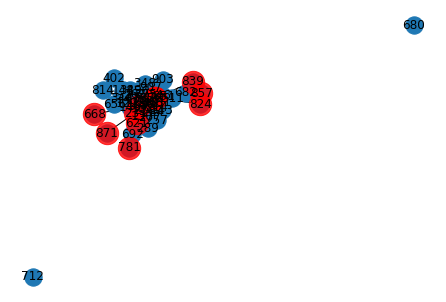

In [86]:
i = 0
nodes = []
for j in range(len(G)):
    if depts[str(j)] == str(i):
        nodes.append(j)
subgraph = G.subgraph(nodes)
bridges_dept_0 = list(nx.bridges(subgraph))
num_bridges_dept_0 = len(bridges_dept_0)
bridge_node = []
for i in range(num_bridges_dept_0):
    bridge_node.append(bridges_dept_0[i][0])
    bridge_node.append(int(bridges_dept_0[i][1]))

pos=nx.spring_layout(subgraph) # positions for all nodes
nx.draw(subgraph, pos, with_labels=True)
# bridge nodes
nx.draw_networkx_nodes(subgraph,pos,
                       nodelist=bridge_node,
                       node_color='r',
                       node_size=500,
                   alpha=0.8)


Some community detection algorithms rely on bridge detection. The [Girvan-Newman](https://en.wikipedia.org/wiki/Girvan%E2%80%93Newman_algorithm) algorithm involves detecting edges which are bridges, or edges which are a lot like bridges, and successively removing them. This slowly disconnects the graph, grouping nodes into communities based on the connected components they end up in. Since many of the departments contain bridges, this method would fail to preserve departmental communities. That may or may not be bad, but it's something we should be aware of.

If we have ground-truth data for a network, or another network which we believe to have similar structure, we can perform simple checks like the one above to determine whether a given algorithm is likely to give us useful information.

## Degree Distribution
How will we know when two networks have a similar structure? There is no simple answer to this question. In the below activity, we'll try to figure out how much like a social network this email network is.

One property that has been observed in some social networks is scalefree structure. This is indicated by plotting the degree distribution of the graph. For every possible degree, we can obtain the number of nodes in the graph with this degree. This data is called the _degree distribution_ of the graph. We can make a plot degree versus the number of nodes observed with this degree in a log-log plot, then if the points lie in a line this indicates a scalefree structure.

In the example below, we calculate the degree distribution from a graph randomly generated using the Barabasi-Albert method, which was designed to produce scalefree networks. 

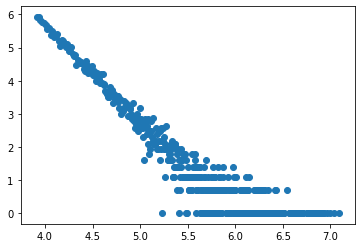

In [70]:
#Generate graph
B_A_graph = nx.barabasi_albert_graph(10000, 50)

#Get a list of node degrees
deg_list = list(dict(B_A_graph.degree()).values())

#Use a Counter to total the occurrences of each degree.
from collections import Counter
counts = Counter(deg_list)
degs = list(counts.keys())
freqs = list(counts.values())

#Take logs and scatter.
x = log(degs)
y = log(freqs)
scatter(x, y)

The top end of the above looks quite linear, while the lower end is a bit splayed out. This is characteristic of a small scalefree network.

In the above code, we used the inbuilt `nx` method to obtain a dictionary-like structure mapping nodes to their degree (for technical reasons, custom libraries like `nx` often have their own versions of standard data structures). Casting this to a regular python dict, we can obtain the values and then cast these again to a list!

We then used the Counter object. Calling a Counter on a list will produce a dict mapping unique entries of the list to their frequency in the list.

Finally, we used `numpy.log` and `matlpolib.pyplot.scatter` to obtain a log-log plot. Note that we were able to call these using just `log` and `scatter`. This is a feature of having used `%pylab inline`, which means the functions in `numpy` and `matplotlib.pyplot` are callable at the top level.

By eyeballing the graph above, we can say that the data looks like it falls into a line. We can make this precise using Pearson's correlation coefficient (PCC). A coefficient value near $\pm1$ suggest the data are strongly correlated (are a lot like a line), while a value near zero suggests weak correlation. The PCC is implemented in `numpy`. The method `numpy.corrcoef` called with two data sets `x` and `y` returns a matrix sowing their correlation. The PCC of `x` with `y` is in any non-diagonal element of this matrix.

In [71]:
corrcoef(x, y)

array([[ 1.        , -0.92141661],
       [-0.92141661,  1.        ]])

So we can see that `x, y` have a fairly good negative correlation. This formalises out notion of the extent to which `x, y` lie on a downwardly sloping line.

Now try plotting the degree distribution of `G`. Do you think this suggests a scale-free structure? Comare this to a [barabasi-albert graph](https://networkx.github.io/documentation/stable/reference/generated/networkx.generators.random_graphs.barabasi_albert_graph.html#networkx.generators.random_graphs.barabasi_albert_graph) with the same number of nodes as G. You should set the parameter `m` to be the average degree of a node in `G`.

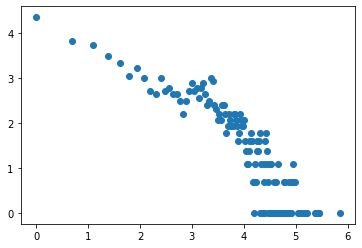

In [87]:
#Get a list of node degrees
deg_list = list(dict(G.degree()).values())

#Use a Counter to total the occurrences of each degree.
from collections import Counter
counts = Counter(deg_list)
degs = list(counts.keys())
freqs = list(counts.values())

#Take logs and scatter.
x = log(degs)
y = log(freqs)
scatter(x, y)

In [88]:
corrcoef(x, y)

array([[ 1.        , -0.89390827],
       [-0.89390827,  1.        ]])

In [103]:
print('The average degrees for G is {:1f} while that of a barabasi-albert graph is {:1f}.'.
      format(mean(deg_list),mean(list(dict(B_A_graph.degree()).values()))))

The average degrees for G is 33.245771 while that of a barabasi-albert graph is 99.500000.


## Further Resources
To find out more about network science, an accessible introdution to some foundational concepts is given in [this paper by Denny](http://www.mjdenny.com/workshops/SN_Theory_I.pdf).

The following courses from [MIT](https://ocw.mit.edu/courses/media-arts-and-sciences/mas-961-networks-complexity-and-its-applications-spring-2011/index.htm) and [Cornell](https://www.cs.cornell.edu/courses/cs6850/2008fa/) are more technical, and give a good overview of a diverse range of topics. The mathematics behind networks is known as graph theory, and those interested in this fascinating topic are directed to the following [notes of Griffin](http://www.personal.psu.edu/cxg286/Math485.pdf), giving a good overview of the area. In this notebook, we have considered social networks. The go-to book on this subject is [Wasserman and Faust](https://discovered.ed.ac.uk/primo-explore/fulldisplay?docid=44UOE_ALMA2185037360002466&context=L&vid=44UOE_VU2&search_scope=default_scope&tab=default_tab&lang=en_US), available from the library. Additionally, the [following lecture by Tsvetovat](https://www.youtube.com/watch?v=qgGqaBAEy3Q) discusses social network analysis using NetworkX.

A useful visualisation library for NetworkX is [nxviz](https://github.com/ericmjl/nxviz/). If conducting analysis in very large-scale networks, you may find that NetworkX will fail to store or process netowrk data efficiently at scale. In this case, it might be worth exploring other network analysis packages. Popular choices include [graph-tool](https://graph-tool.skewed.de/), [igraph](https://igraph.org/python/) and [SNAP](http://snap.stanford.edu/snappy/index.html), but please note that we can't guarantee that the installation of these packages will be easy! if you are working with large but very sparse networks, then you may find some useful functionality available in the SciPy module `scipy.sparse.csgraph` (see also our SciPy extension notebook `python-data-extra-scipy`).

# References
1. Data obtained from _SNAP Datasets: Stanford Large Network Dataset Collection_, Jure Leskovec and Andrej Krevl 2014, http://snap.stanford.edu/data, accessed Jan 2019.<a name="snap"></a>